In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [36]:
first_six = [index for index, target in enumerate(digits['target']) if target in list(range(6))]

In [110]:
first_six_digits = [image for index, image in enumerate(digits['data']) if index in first_six]
len(first_six_digits)
subset = first_six_digits[:100]

1083

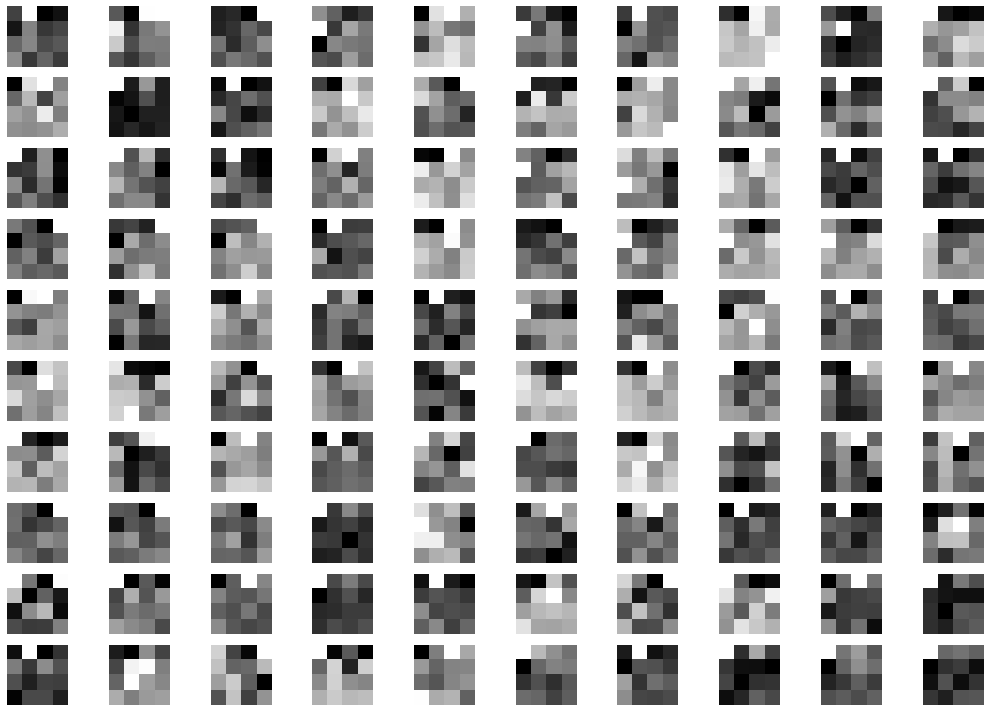

In [119]:
fig = plt.figure(figsize=(15,10))
for x in range(100):
    sub = fig.add_subplot(10,10,x+1)
    img = plt.imshow(test[x].reshape(4,4), cmap='gray')
    xticks = plt.xticks([])
    yticks = plt.yticks([])
    off = plt.axis('off')
    plt.tight_layout()

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [123]:
scaled = scaler.fit_transform(first_six_digits)

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA(n_components=8)

In [126]:
data = pca.fit_transform(scaled)

In [127]:
def scree_plot(ax, pca, n_components_to_plot=8, title=None):
    """Make a scree plot showing the variance explained (i.e. variance
    of the projections) for the principal components in a fit sklearn
    PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the scree plot.
      
    title: str
      A title for the scree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
		   (ind[i]+0.2, vals[i]+0.005), 
		   va="bottom", 
		   ha="center", 
		   fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

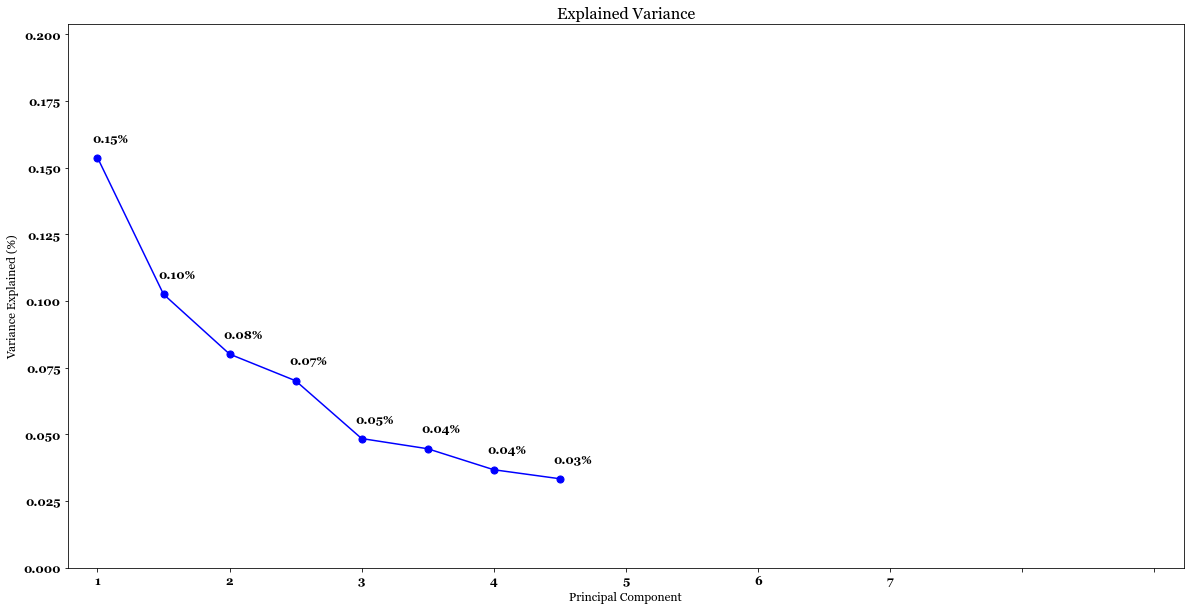

In [128]:
fig, ax = plt.subplots()
scree_plot(ax, pca, n_components_to_plot=16, title='Explained Variance')

In [122]:
pca.explained_variance_ratio_

array([0.17650424, 0.15121597, 0.13241924, 0.09604901, 0.07127729,
       0.04782236, 0.03553686, 0.03012953, 0.02800199, 0.02324802,
       0.02067348, 0.01668799, 0.01591094, 0.01525779, 0.01437121,
       0.01237547])

In [131]:
data.shape

(1083, 8)

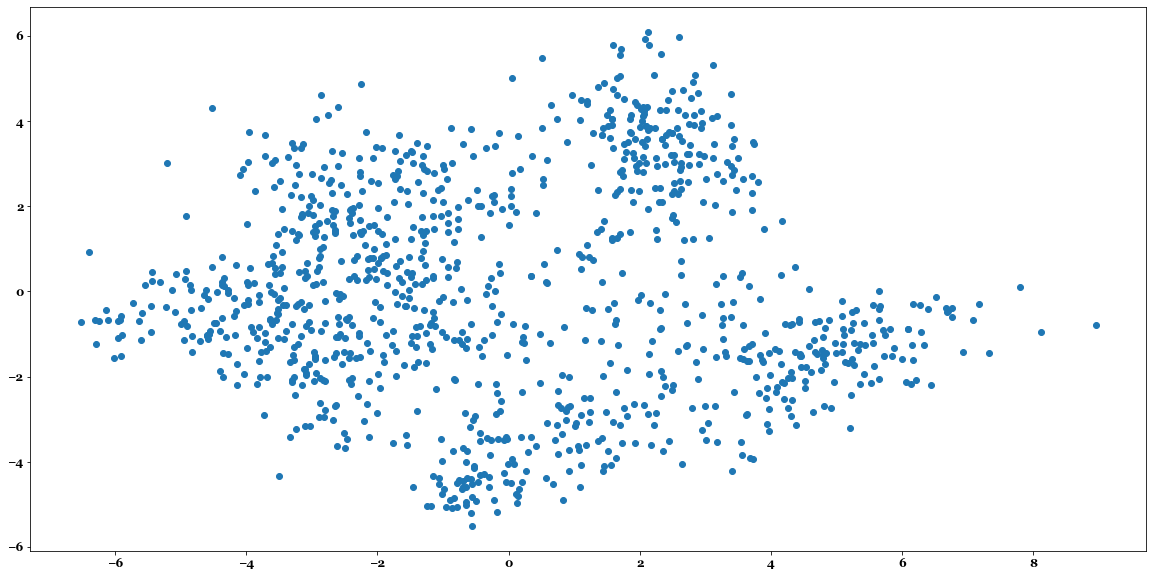

In [108]:
plt.scatter(x,y)

In [120]:
def plot_mnist_embedding(ax, X, y, title=None):
    """Plot an embedding of the mnist dataset onto a plane.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    X: numpy.array, shape (n, 2)
      A two dimensional array containing the coordinates of the embedding.
      
    y: numpy.array
      The labels of the datapoints.  Should be digits.
      
    title: str
      A title for the plot.
    """
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 
                 str(y[i]), 
                 color=plt.cm.Set1(y[i] / 10.), 
                 fontdict={'weight': 'bold', 'size': 12})

    ax.set_xticks([]), 
    ax.set_yticks([])
    ax.set_ylim([-0.1,1.1])
    ax.set_xlim([-0.1,1.1])

    if title is not None:
        ax.set_title(title, fontsize=16)

In [ ]:
fig, ax = plt.subplots()
plot_mnist_embedding(ax, )